# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

You're probably going to need PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
#!mkdir data

In [2]:
#import "plot_things.py", that is one folder above this one
import sys
sys.path.append("..")
from plot_things import *

1. PyTorch is based on tensor operations. First' let's try using them:
- create simple python list with four values and convert it to PyTorch tensor
- create numpy array with random values and shape (1,3,7,7) and convert it to Pytorch tensor
- create PyTorch tensor with random values and shape (1,3,7,7) with preset seed
- create PyTorch tensor with linear space in range from -5 to 15 and reshape it to tensor with shape (1,3,7,7)
- create PyTorch tensor of zeros with shape (1,3,7,7)

For display use `print` function.

In [3]:
import torch
#create simple python list with four values and convert it to PyTorch tensor
my_list = [1, 2, 3, 4]
tensor = torch.tensor(my_list)
#create numpy array with random values and shape (1,3,7,7) and convert it to Pytorch tensor
import numpy as np
my_array = np.random.rand(1,3,7,7)
tensor2 = torch.tensor(my_array)
#create PyTorch tensor with random values and shape (1,3,7,7) with preset seed
torch.manual_seed(42)
tensor3 = torch.rand(1,3,7,7)
#create PyTorch tensor with linear space in range from -5 to 15 and reshape it to tensor with shape (1,3,7,7)
tensor4 = torch.linspace(-5, 15, steps=147).reshape(1,3,7,7)
#create PyTorch tensor of zeros with shape (1,3,7,7)
tensor5 = torch.zeros(1,3,7,7)

#print all tensors
print(tensor)
print(tensor2)
print(tensor3)
print(tensor4)
print(tensor5)

tensor([1, 2, 3, 4])
tensor([[[[0.4286, 0.1447, 0.6118, 0.8814, 0.1096, 0.5333, 0.4420],
          [0.9147, 0.4693, 0.5577, 0.6000, 0.5448, 0.9805, 0.3827],
          [0.7663, 0.4001, 0.4980, 0.0349, 0.9382, 0.7522, 0.5024],
          [0.1019, 0.4382, 0.6769, 0.3680, 0.6386, 0.1601, 0.3114],
          [0.0184, 0.9693, 0.8221, 0.3807, 0.1350, 0.0829, 0.7181],
          [0.7879, 0.9967, 0.6665, 0.6028, 0.2986, 0.7167, 0.3226],
          [0.9477, 0.6683, 0.9631, 0.4866, 0.7754, 0.4206, 0.3725]],

         [[0.5314, 0.3042, 0.8298, 0.6336, 0.5004, 0.4449, 0.9165],
          [0.9745, 0.1178, 0.6985, 0.6276, 0.1622, 0.6181, 0.4599],
          [0.5469, 0.3201, 0.7367, 0.1420, 0.0495, 0.5592, 0.2427],
          [0.0666, 0.0107, 0.5293, 0.5305, 0.5114, 0.1933, 0.1599],
          [0.2305, 0.5683, 0.9355, 0.8855, 0.3556, 0.5862, 0.9438],
          [0.7759, 0.4631, 0.4295, 0.4579, 0.3010, 0.4415, 0.3047],
          [0.6705, 0.3468, 0.9538, 0.2519, 0.0529, 0.0278, 0.6767]],

         [[0.6909, 0.67

2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`. Then, move one of your tensors to selected device.

In [4]:
#check if PyTorch is using GPU
torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#list devices
print("torch.cuda.device_count()", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print("torch.cuda.get_device_name(",i,")", torch.cuda.get_device_name(i))
#set default device to GPU using device index
torch.cuda.set_device(0)

torch.cuda.device_count() 1
torch.cuda.get_device_name( 0 ) NVIDIA GeForce RTX 3060 Laptop GPU


3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

Finally, compare the number of object in each class in both datasets.

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from copy import deepcopy
from torchvision import transforms

#Download `MINIST` dataset with `torchvision.dataset`.
#For any kind of ML task, validation or testing is required.
#So, create train and test datasets.

completeTransforms = transforms.Compose([ToTensor(),transforms.RandomCrop(28, padding=2),
                                        transforms.RandomRotation(15,interpolation=transforms.InterpolationMode.BILINEAR),
                                        transforms.RandomAffine(0, translate=(0.05, 0.05))])

mnist_train = datasets.MNIST(root='data', train=True, download=True, transform=completeTransforms)
mnist_test = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

#For both apply ToTensor.
tensor_mnist_train = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
tensor_mnist_test = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)
#Next, pack datasets into `DataLoader`s with batch size of 64.
#Use variables with names: `train_loader` and `test_loader`.
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)
#Next display sizes of datasets, shapes of elements and display few images and their labels.
print("mnist_train", len(mnist_train), mnist_train[0][0].shape)

mnist_train 60000 torch.Size([1, 28, 28])


i= 0 dims= torch.Size([28, 28])
i= 1 dims= torch.Size([28, 28])
i= 2 dims= torch.Size([28, 28])
i= 3 dims= torch.Size([28, 28])
i= 4 dims= torch.Size([28, 28])


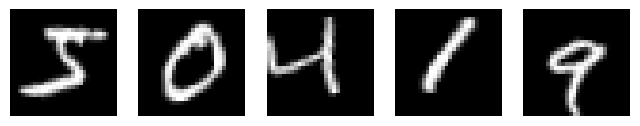

In [6]:
plot_things([mnist_train[i][0][0] for i in range(5)])

In [7]:
#Finally, compare the number of object in each class in both datasets.
from tqdm.notebook import tqdm
# train_classes=[0]*10
# test_classes=[0]*10
# for i in tqdm(range(len(mnist_train))):
#     train_classes[mnist_train[i][1]]+=1
# for i in tqdm(range(len(mnist_test))):
#     test_classes[mnist_test[i][1]]+=1
# print("train_classes", train_classes)
# print("test_classes", test_classes)
#speed up above calculations
train_classes_2=[mnist_train[i][1] for i in range(len(mnist_train))]
test_classes_2=[mnist_test[i][1] for i in range(len(mnist_test))]
train_classes_2 = np.bincount(train_classes_2)
test_classes_2 = np.bincount(test_classes_2)
print("train_classes_2", train_classes_2)
print("test_classes_2", test_classes_2)

train_classes_2 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
test_classes_2 [ 980 1135 1032 1010  982  892  958 1028  974 1009]


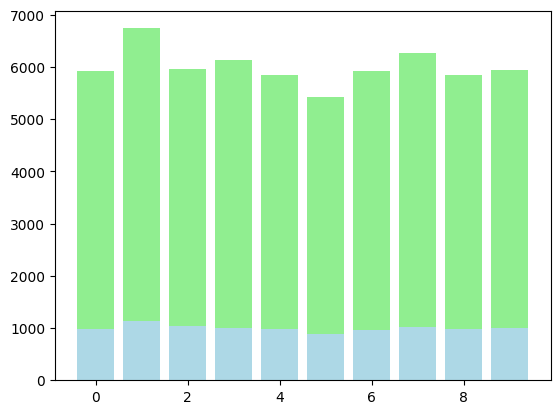

In [8]:
#create a bar graph, that shows train classes with red bars and test classes with blue bars
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(10), train_classes_2, color="lightgreen")
plt.bar(np.arange(10), test_classes_2, color='lightblue')
plt.show()

5. We have our dataset ready, lets create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first layer with 512 neurons,
- second layer with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.

Layers:
- `torch.nn.Sequential`
    - layer allows for forward pass through
        component layers:
        ```
        t_in: Tensor
        t_out: Tensor = t_in
        for L in layers:
            t_out = L(t_out)
        return t_out```
        
- `torch.nn.Flatten`
    - layer makes input tensor flattened:
    - (bs,CH,H,W) - > (bs,CH*H*W)
    
- `torch.nn.Linear(ch_in, ch_out, bias)`
    - 'classical' neural network layer - fully connected
    - ch_in is a number of input channels
    - ch_out is number of output channels / number of neurons in layer
    - bias - whether to use bias parameter
    - for Linear layers it is recommended to use flatten layer before,
            when input has more than 2 dimensions
    - operation implemented by this layer is a vector / matrix multiplication
        - `y = W x v` or `y = W x v + b`
        - W has a shape [ch_out, ch_in]
        - v has a shape [ch_in]
        - b has a shape [ch_in]
        - y has a shape [ch_out]

- `torch.nn.ReLU`
    - layer applies ReLU function on input tensor
    
- `torch.nn.Softmax(dim)`
    - layer applies softmax function on input tensor
    - `dim` - dimension over which function is calculated


For the formulas of activation function go to [torch documentation](https://pytorch.org/docs/stable/index.html)

In [9]:
import torch
import torch.nn as nn

class MLP(nn.Module):

    def __init__(self, input_shape, output_size) -> None:
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_shape, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Assuming you have specified the input_shape and output_size for your problem
input_shape = 28 * 28  # Example input shape for 28x28 grayscale images
output_size = 10  # Specify the number of output classes for your classification problem
net = MLP(input_shape, output_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)


6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [10]:
#import nn
import torch.nn as nn
#To train network we need to know 'how good or bad' results it gives. Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.
loss_fcn = nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer. For clasification we can assume, that the final answer is the class with highest probability (`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [11]:
from abc import ABC, abstractmethod
from typing import Any

class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()

class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # Get the predicted class indices by taking argmax along dimension 1
        predicted_classes = torch.argmax(y_pred, dim=1)

        # Calculate the accuracy by comparing predicted and reference labels
        correct_predictions = (predicted_classes == y_ref).sum().item()
        total_samples = y_ref.size(0)

        # Compute the accuracy as a scalar tensor
        accuracy = torch.tensor(correct_predictions / total_samples, dtype=torch.float32)

        return accuracy


metric = AccuracyMetic()

8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [12]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

9. Now define training / testing function:

In [13]:
from typing import Tuple

def train_or_test(model,
          data_generator,
          criterion,
          metric: BaseMetic,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None,
          update_period: int = None,
          device = torch.device('cuda')) -> Tuple[torch.nn.Module, float, float]:
    
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    else:
        raise RuntimeError("Unsupported mode.")

    model.to(device)

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    for i, (X, y) in tqdm(enumerate(data_generator)):
        X, y = X.to(device), y.to(device)  # Move data to the device

        optimizer.zero_grad() if mode == 'train' else None

        y_pred = model(X)  # Forward pass

        loss = criterion(y_pred, y)  # Calculate the loss

        if mode == 'train':
            loss.backward()  # Backpropagation

            if (i + 1) % update_period == 0:
                optimizer.step()  # Update model parameters

        accuracy = metric(y_pred, y)  # Calculate accuracy

        total_loss += loss.item() * y.size(0)
        total_accuracy += accuracy.item() * y.size(0)
        samples_num += y.size(0)

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num


10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement stopping training when accuracy stopped changing significantly.

Epoch 1/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (1,)
i= 1 dims= (1,)
i= 2 dims= (1,)
i= 3 dims= (1,)


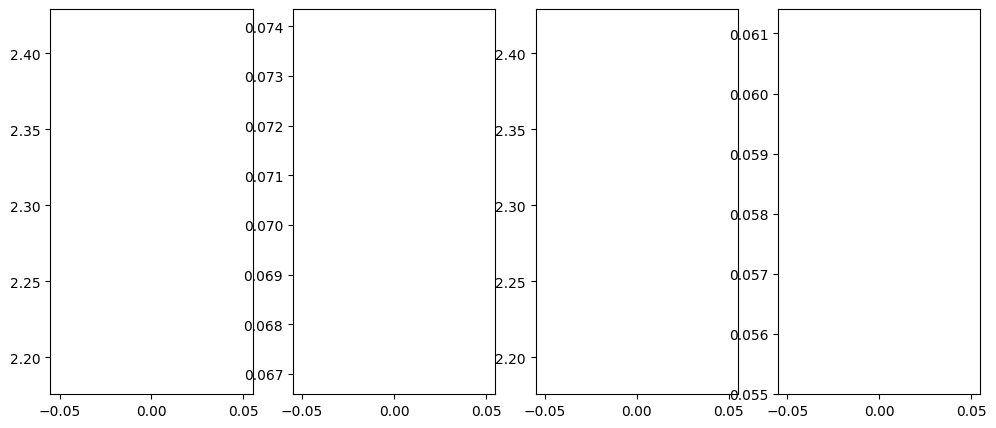

Epoch 2/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (2,)
i= 1 dims= (2,)
i= 2 dims= (2,)
i= 3 dims= (2,)


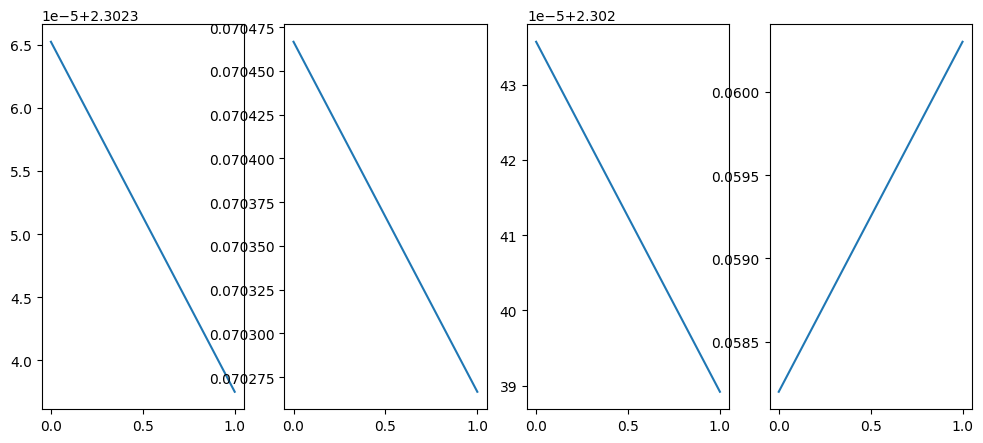

Epoch 3/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (3,)
i= 1 dims= (3,)
i= 2 dims= (3,)
i= 3 dims= (3,)


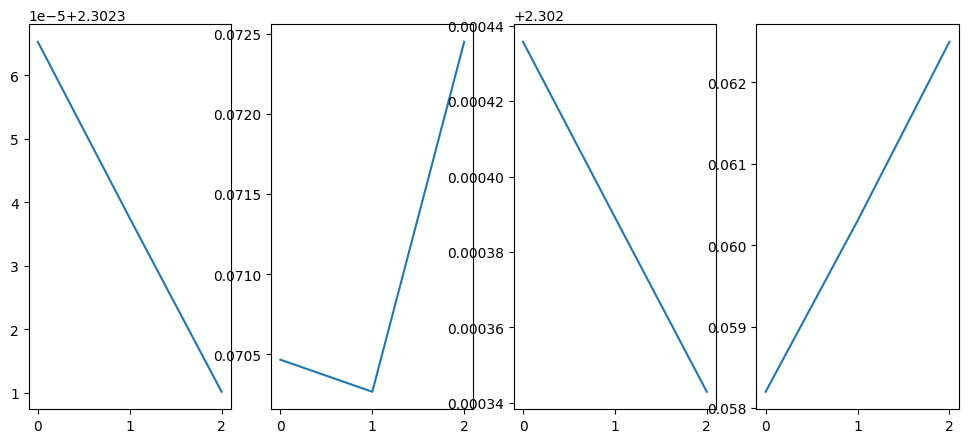

Epoch 4/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (4,)
i= 1 dims= (4,)
i= 2 dims= (4,)
i= 3 dims= (4,)


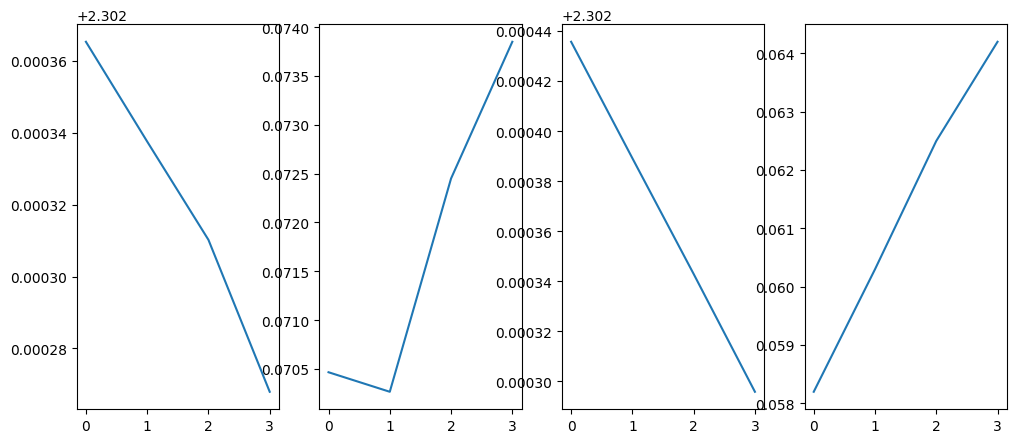

Epoch 5/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (5,)
i= 1 dims= (5,)
i= 2 dims= (5,)
i= 3 dims= (5,)


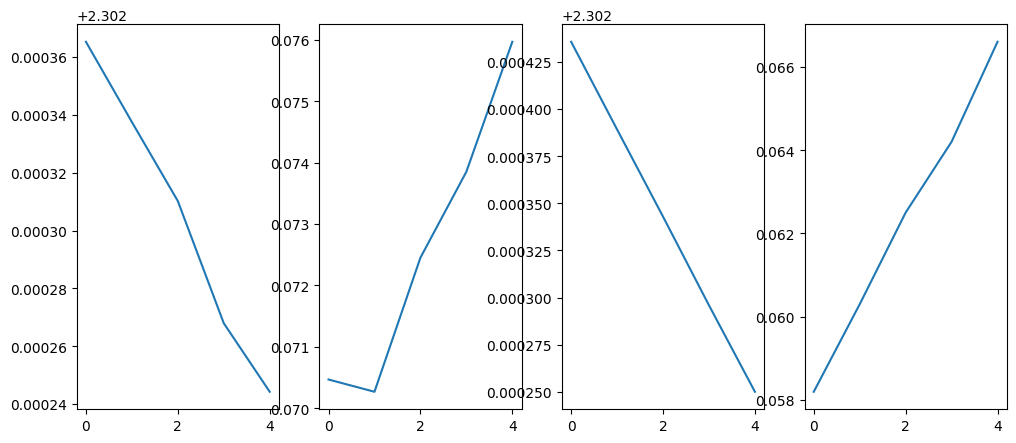

Epoch 6/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (6,)
i= 1 dims= (6,)
i= 2 dims= (6,)
i= 3 dims= (6,)


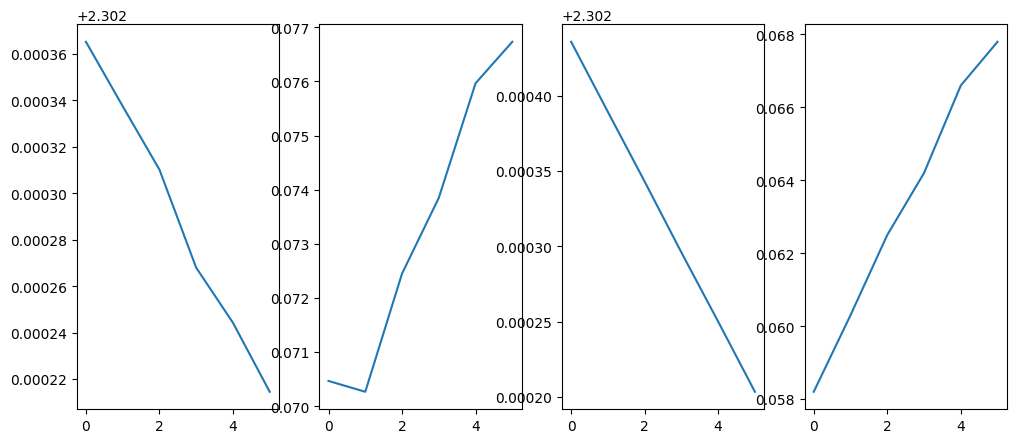

Epoch 7/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (7,)
i= 1 dims= (7,)
i= 2 dims= (7,)
i= 3 dims= (7,)


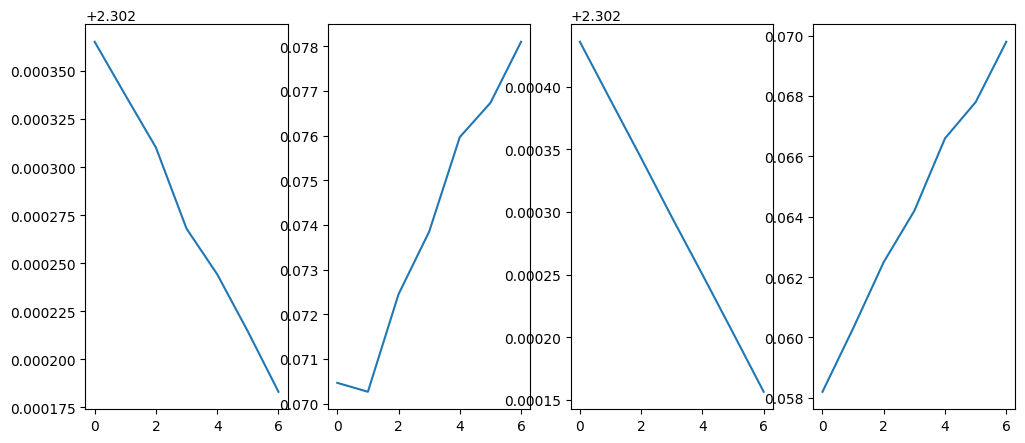

Epoch 8/30


0it [00:00, ?it/s]

with torch.no_grad():


0it [00:00, ?it/s]

Autodetecting 1D array
i= 0 dims= (8,)
i= 1 dims= (8,)
i= 2 dims= (8,)
i= 3 dims= (8,)


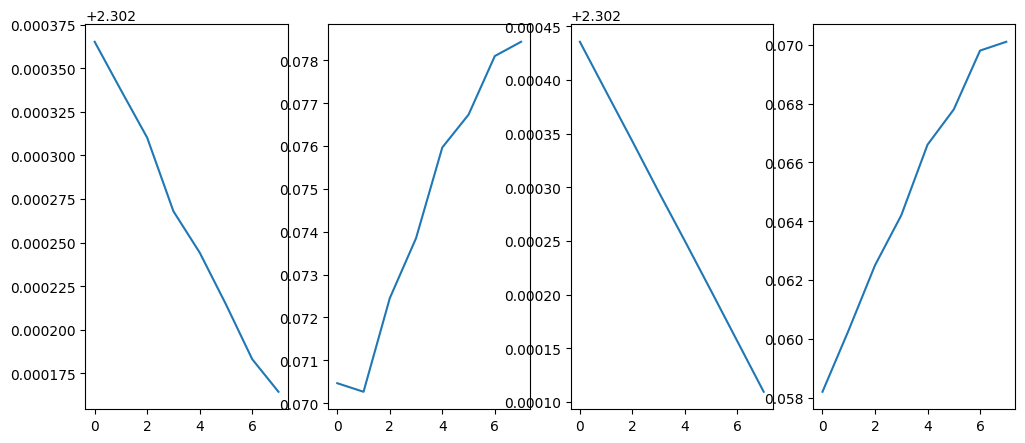

Epoch 9/30


0it [00:00, ?it/s]

KeyboardInterrupt: 

In [15]:
def training(model,
             train_loader,
             loss_fcn,
             metric,
             optimizer,
             update_period,
             epoch_max,
             accuracy_threshold,
             device):
    loss_train = np.array([])
    acc_train = np.array([])

    loss_test = np.array([])
    acc_test = np.array([])

    for epoch in range(epoch_max):
        print(f"Epoch {epoch + 1}/{epoch_max}")
        model, train_loss, train_accuracy = train_or_test(model, train_loader, loss_fcn, metric, 'train', optimizer, update_period, device)
        loss_train = np.append(loss_train, train_loss)
        acc_train = np.append(acc_train, train_accuracy)

        # Testing
        with torch.no_grad():
            print("with torch.no_grad():")
            model, test_loss, test_accuracy = train_or_test(model, test_loader, loss_fcn, metric, 'test', None, None, device)
            loss_test = np.append(loss_test, test_loss)
            acc_test = np.append(acc_test, test_accuracy)
            
        plot_things([loss_train, acc_train, loss_test, acc_test],hideAxes=False,verbose=True,sizeX=12,sizeY=4)
        plt.show()
        
        # Check if the accuracy threshold has been reached
        if test_accuracy >= accuracy_threshold:
            print(f"Accuracy threshold ({accuracy_threshold}) reached at epoch {epoch + 1}. Stopping training.")
            break

        best_accuracy=0
        # Check if this epoch achieved the best accuracy so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            # Save the model checkpoint if accuracy improved
            torch.save(model.state_dict(), "best_model.pth")

    return model, {'loss_train': loss_train,
                   'acc_train': acc_train,
                   'loss_test': loss_test,
                   'acc_test': acc_test}

net, history = training(net,
                        train_loader,
                        loss_fcn,
                        metric,
                        optimizer,
                        update_period=5,
                        epoch_max=30,
                        accuracy_threshold=0.99,
                        device=device)

11. Display training history.

In [ ]:
#display training history
plot_things([history['loss_train'], history['loss_test']])

c:\Users\krzys\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\figure.py:2533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if not np.isfinite(figsize).all() or (np.array(figsize) < 0).any():


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [ ]:
#save model and optimizer states to files
#use method state_dict and function torch.save
torch.save(net.state_dict(), "net.pth")
torch.save(optimizer.state_dict(), "optimizer.pth")

13. Create new network with the same architecture and initialize it with saved weights. Compare evaluations for both networks

`torch.load`, `load_state_dict`.

In [ ]:
#Create new network with the same architecture and initialize it with saved weights. Compare evaluations for both networks
# use `torch.load`, `load_state_dict`.
net2 = MLP(input_shape, output_size)
net2.load_state_dict(torch.load("net.pth"))
net2.eval()
net2.to(device)
net2, test_loss, test_accuracy = train_or_test(net2, test_loader, loss_fcn, metric, 'test', None, None, device)
print("test_loss", test_loss)
print("test_accuracy", test_accuracy)

14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [ ]:
...